In [1]:
from datasets import load_dataset
dataset = load_dataset("huggan/smithsonian_butterflies_subset",split="train")
print(dataset)
print(len(dataset))

Repo card metadata block was not found. Setting CardData to empty.


Dataset({
    features: ['image_url', 'image_alt', 'id', 'name', 'scientific_name', 'gender', 'taxonomy', 'region', 'locality', 'date', 'usnm_no', 'guid', 'edan_url', 'source', 'stage', 'image', 'image_hash', 'sim_score'],
    num_rows: 1000
})
1000


In [13]:
type(dataset[[1,2,3]])

dict

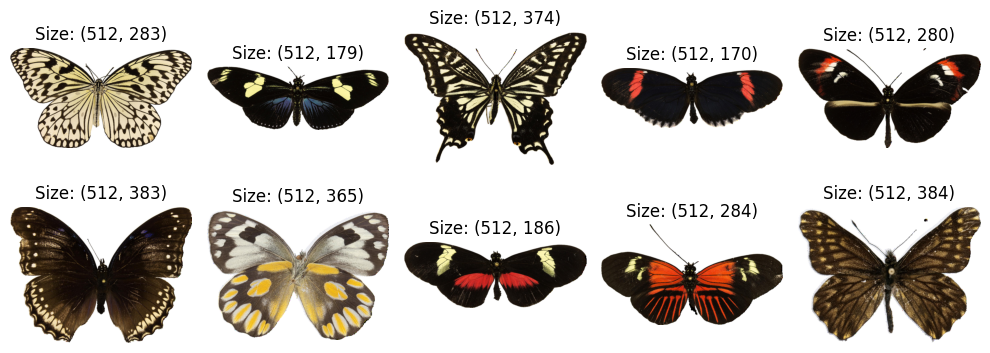

In [7]:
import matplotlib.pyplot as plt
from math import ceil
from PIL.Image import Image
import numpy as np
def show_images(images: list[Image] | np.ndarray, img_per_row=None):
    img_per_row = img_per_row or max(5,int(len(images)/2))
    n_rows = ceil(len(images) / img_per_row)
    fig, axes = plt.subplots(n_rows, img_per_row, figsize=(img_per_row * 2, n_rows * 2))
    axes = axes.flatten()

    for i,  img in enumerate( images):
        ax = axes[i]
        ax.imshow(img)
        ax.set_title(f"Size: {img.size if isinstance(img, Image) else img.shape}")
        ax.axis("off")  # Hide axes ticks and labels
    for j in range(len(images), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

n_imgs = 10
n_imgs_per_row = 5
show_images(dataset["image"][:n_imgs], n_imgs_per_row)


In [9]:
from torchvision.transforms import v2
import torch

resize_pipe = v2.Compose([
    v2.ToImage(),
    v2.Resize([128,128]), # Always resize in the very first of pipeline, when data is in uint8
])

transform_pipe = v2.Compose([
    v2.ToDtype(dtype=torch.float,scale = True),
    v2.RandomHorizontalFlip(0.5),
    v2.Normalize([0.5],[0.5]) # convert to [-1,1]
])

def transform(examples):
    examples = resize_pipe(examples["image"])
    return {"images": transform_pipe(torch.stack(examples,0))}

dataset.set_transform(transform)

torch.Size([10, 3, 128, 128]) tensor(-1.) tensor(1.) torch.float32


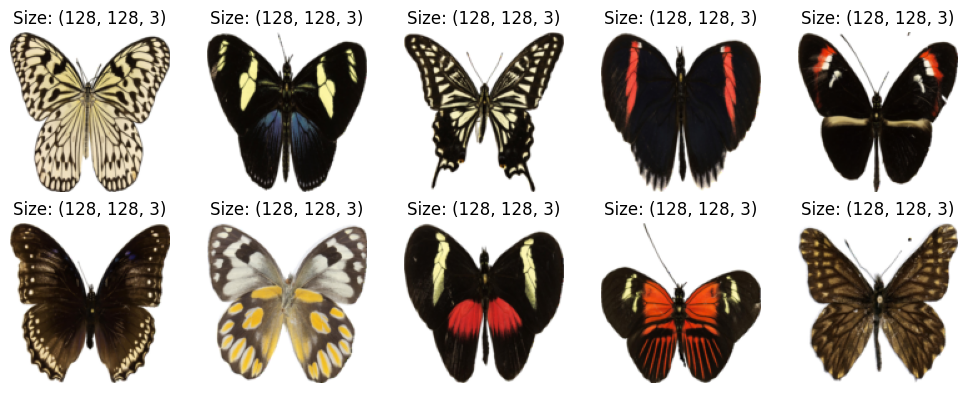

In [12]:
batch:torch.Tensor = dataset[:n_imgs]["images"]
print(batch.shape, batch.min(),batch.max(), batch.dtype)
show_images((batch/2+0.5).permute(0,2,3,1).numpy())